In [1]:
# =====================================================
# Collaborator 1: Rename Columns, EDA and Data Cleaning
# =====================================================

# Load libraries 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Inspect Dataset

In [2]:
# -------------------------------
# Load Dataset
# -------------------------------
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


This dataset contains 768 rows and 9 features. We can see that all the features are numercial except for the Outcome. 

## Check statistical distribution

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As we can see, the minimum value of the features Glucose, BloodPressure, SkinThickness, Insulin and BMI is 0. This is not correct because these values can't be 0, as this would indicate that the measurement was not taken correctly. Later we will replace this values with the mean value of that feature.

## Check Missing Values

In [5]:
def count_na(df, col):
    print(f"Null values in {col}: ", df[col].isna().sum())

for feat in df.columns:
    count_na(df, feat)

Null values in Pregnancies:  0
Null values in Glucose:  0
Null values in BloodPressure:  0
Null values in SkinThickness:  0
Null values in Insulin:  0
Null values in BMI:  0
Null values in DiabetesPedigreeFunction:  0
Null values in Age:  0
Null values in Outcome:  0


There are no missing values in the dataset

## Check Duplicates

In [6]:
df.duplicated().sum()

0

There are no duplicate values in the dataset

## Exploratory Data Analysis Plots

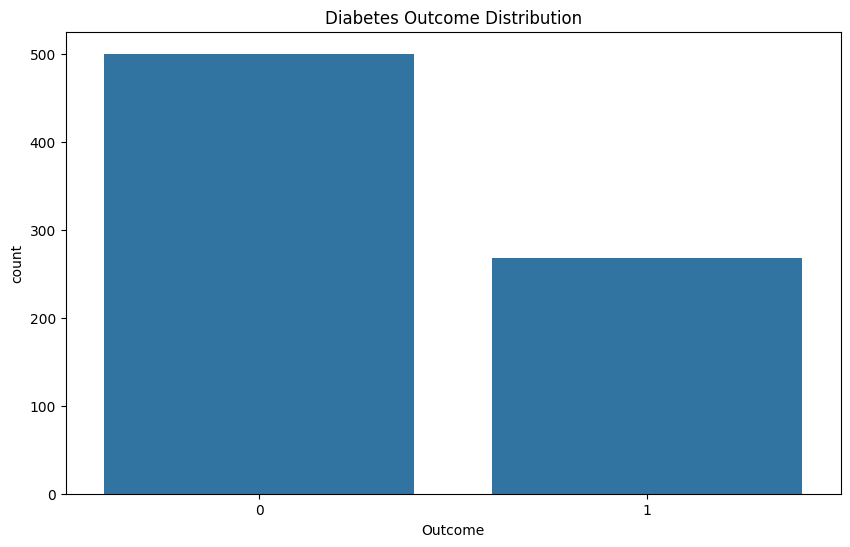

In [7]:
# --------------------
# Outcome Distribution
# --------------------
plt.figure(figsize=(10,6))
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Distribution")
plt.show()

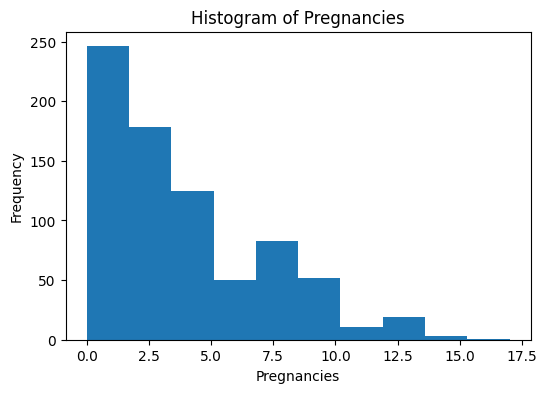

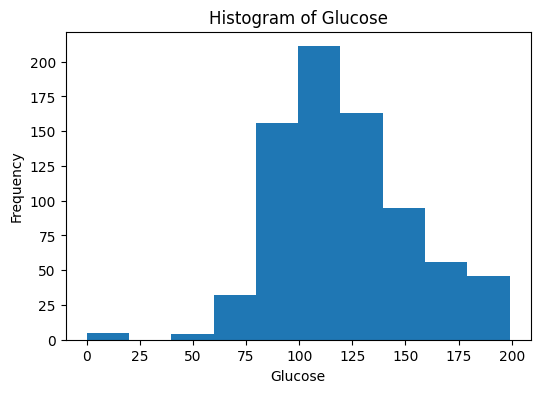

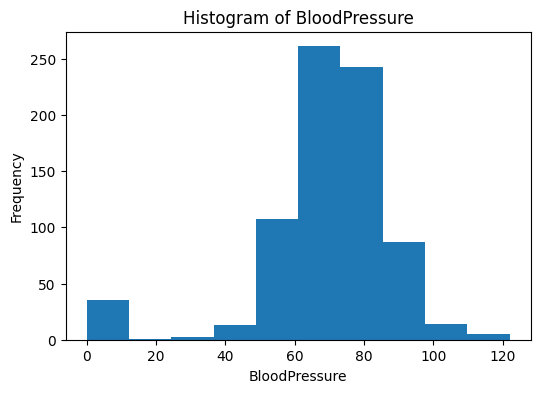

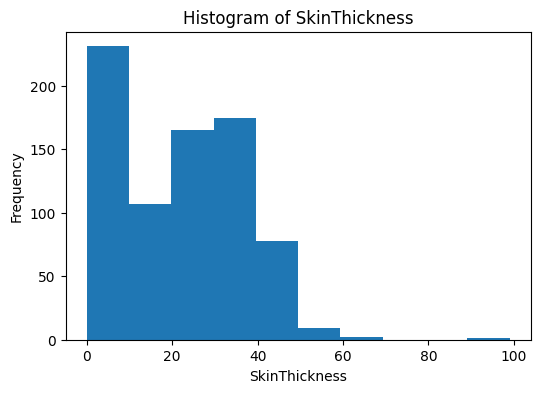

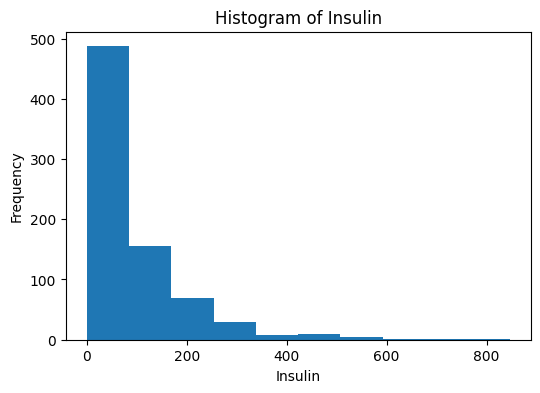

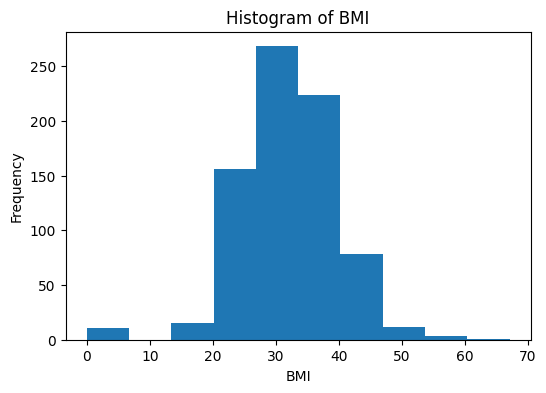

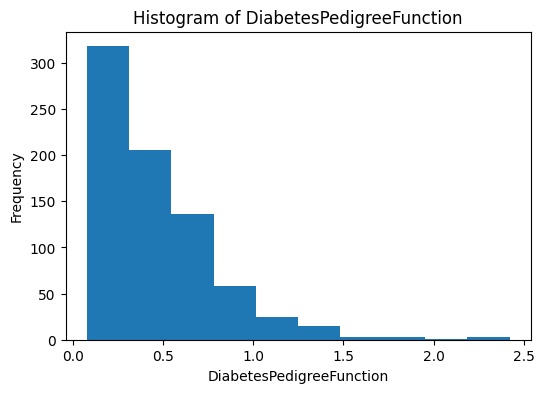

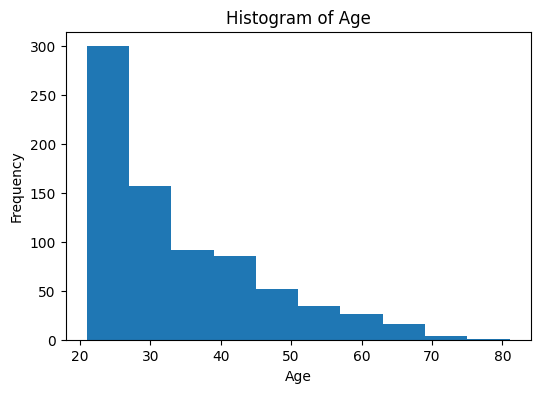

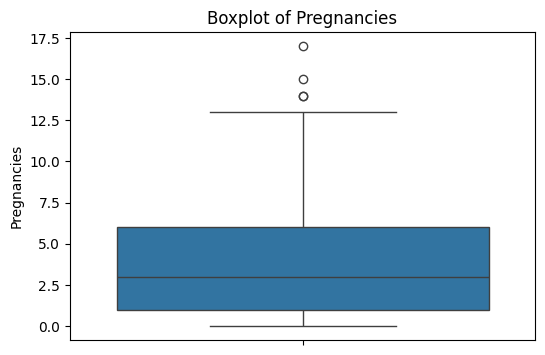

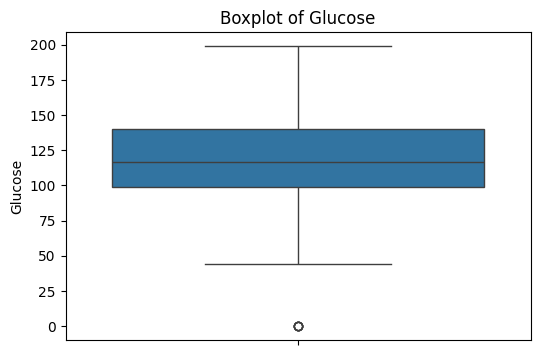

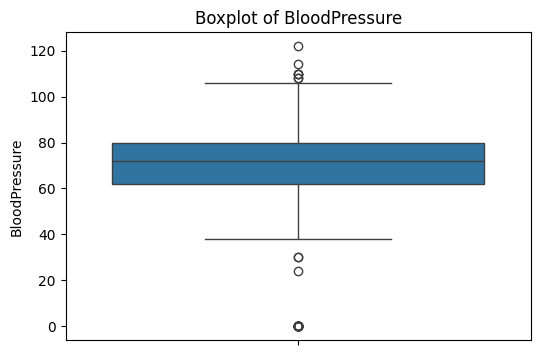

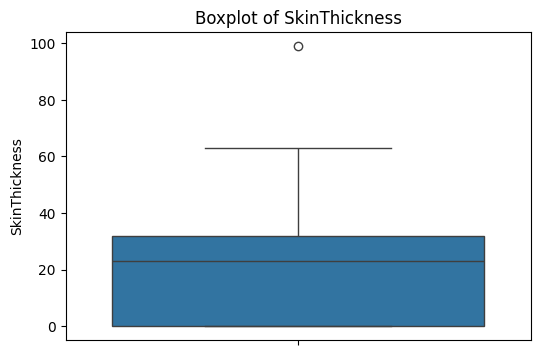

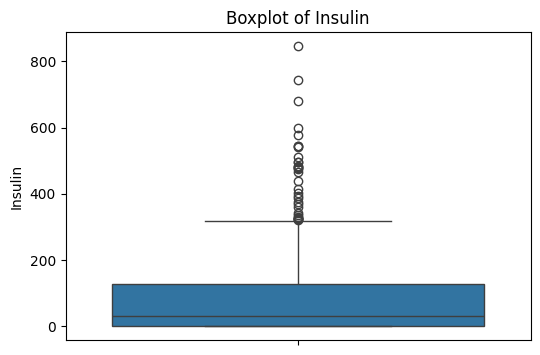

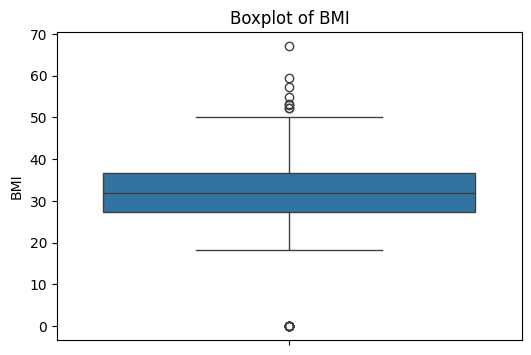

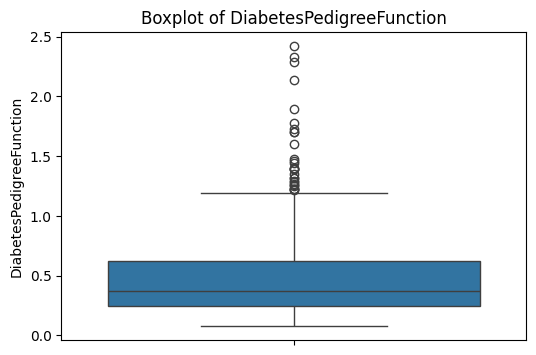

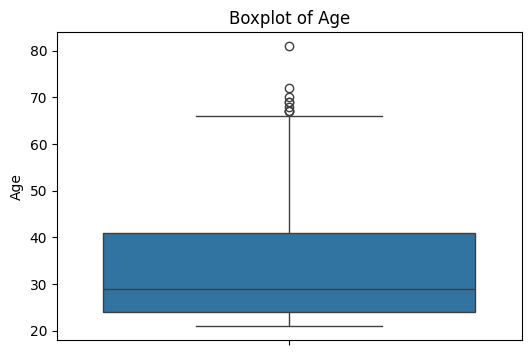

In [8]:
# --------------------------------------------
# Histogram and Boxplot for Numerical Columns
# --------------------------------------------
# Histograms
numeric_cols = df.columns[:-1]
for col in numeric_cols:
    plt.figure(figsize=(6,4))       
    plt.hist(df[col])  
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Boxplots
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

## Check Variability

In [9]:
df.describe()
numeric_cols = df.columns[:-1]  # exclude outcome
for col in numeric_cols:
    mean = df[col].mean()
    std = df[col].std()
    cv = std / mean
    print(f"{col}: mean={mean:.2f}, std={std:.2f}, Variability={cv:.2f}")


Pregnancies: mean=3.85, std=3.37, Variability=0.88
Glucose: mean=120.89, std=31.97, Variability=0.26
BloodPressure: mean=69.11, std=19.36, Variability=0.28
SkinThickness: mean=20.54, std=15.95, Variability=0.78
Insulin: mean=79.80, std=115.24, Variability=1.44
BMI: mean=31.99, std=7.88, Variability=0.25
DiabetesPedigreeFunction: mean=0.47, std=0.33, Variability=0.70
Age: mean=33.24, std=11.76, Variability=0.35


* Insulin has the largest variability (> 1).

* Pregnancies and diabetes_pedigree are also quite variable (> 0.7).

* Blood pressure, BMI and glucose have small variability relative to their mean (< 0.3).

# Clean Dataset

## Rename Columns

In [18]:
dict_names = {
    "Pregnancies": "pregnancies",
    "Glucose": "glucose",
    "BloodPressure": "blood_pressure",
    "SkinThickness": "skin_thickness",
    "Insulin": "insulin",
    "BMI": "bmi",
    "DiabetesPedigreeFunction": "diabetes_pedigree",
    "Age": "age",
    "Outcome": "outcome"
}

def rename_dataframe_columns(df, dict_names):
    df_renamed = df.rename(columns=dict_names)
    return df_renamed

df_renamed = rename_dataframe_columns(df, dict_names)

## Handle Incorrect 0 Values (replace with median)

In [19]:
invalid_zero_features = ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi']

for col in invalid_zero_features:
    median = df_renamed[col].median()
    df_renamed[col] = df_renamed[col].replace(0, median)

print("Replaced 0 values with median for features:", invalid_zero_features)

Replaced 0 values with median for features: ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi']


## Handle Outliers (replace with median)

We replace outliars with the median since it is robust to extreme values

In [20]:
def handle_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        median = df_clean[col].median()
        df_clean[col] = df_clean[col].mask((df_clean[col] < lower) | (df_clean[col] > upper), median)
    return df_clean

numeric_cols = df_renamed.columns[:-1]  # exclude outcome
df_clean = handle_outliers(df_renamed, numeric_cols)

# -------------------------------
# Save Cleaned Dataset
# -------------------------------
df_clean.to_csv("diabetes_clean.csv", index=False)
print("Cleaned dataset saved as diabetes_clean.csv")

Cleaned dataset saved as diabetes_clean.csv


## Check Distribution of the Cleaned Dataset

In [21]:
df_clean.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.782552,121.656250,72.108073,26.278646,70.755534,32.198958,0.427667,32.760417,0.348958
std,3.270644,30.438286,10.874178,7.493445,59.661471,6.410558,0.245162,11.055385,0.476951
min,0.000000,44.000000,40.000000,10.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.875000,32.000000,0.371750,29.000000,0.000000
75%,6.000000,140.250000,80.000000,31.000000,105.000000,36.300000,0.582250,40.000000,1.000000
max,13.000000,199.000000,104.000000,45.000000,272.000000,50.000000,1.191000,66.000000,1.000000
